<a href="https://colab.research.google.com/github/meghadandapat/DSBDAL/blob/main/Model_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns


In [ ]:
df = pd.read_csv("Heart.csv")

In [ ]:
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


## Data Cleaning

In [ ]:
numeric_data = df.drop(columns=['ChestPain','Thal','AHD'])
numeric_data

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
0,1,63,1,145,233,1,2,150,0,2.3,3,0.0
1,2,67,1,160,286,0,2,108,1,1.5,2,3.0
2,3,67,1,120,229,0,2,129,1,2.6,2,2.0
3,4,37,1,130,250,0,0,187,0,3.5,3,0.0
4,5,41,0,130,204,0,2,172,0,1.4,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,110,264,0,0,132,0,1.2,2,0.0
299,300,68,1,144,193,1,0,141,0,3.4,2,2.0
300,301,57,1,130,131,0,0,115,1,1.2,2,1.0
301,302,57,0,130,236,0,2,174,0,0.0,2,1.0


In [ ]:
df.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [ ]:
df['Ca'].fillna(method="ffill",inplace=True)

In [ ]:
df['Thal'].fillna(method="ffill",inplace=True)

In [ ]:
df.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            0
Thal          0
AHD           0
dtype: int64

In [ ]:
(numeric_data < 0).values.any()

False

In [ ]:
data2 = numeric_data.drop(numeric_data.index[numeric_data['Slope'] < 0])
data2

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
0,1,63,1,145,233,1,2,150,0,2.3,3,0.0
1,2,67,1,160,286,0,2,108,1,1.5,2,3.0
2,3,67,1,120,229,0,2,129,1,2.6,2,2.0
3,4,37,1,130,250,0,0,187,0,3.5,3,0.0
4,5,41,0,130,204,0,2,172,0,1.4,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,110,264,0,0,132,0,1.2,2,0.0
299,300,68,1,144,193,1,0,141,0,3.4,2,2.0
300,301,57,1,130,131,0,0,115,1,1.2,2,1.0
301,302,57,0,130,236,0,2,174,0,0.0,2,1.0


## Data Transformation

In [ ]:
subset1 = df[df['Thal']=='normal']
subset2 = df[df['Thal']=='fixed']

In [ ]:
df_modified = [subset1,subset2]

In [ ]:
pd.concat(df_modified)

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
5,6,56,1,nontypical,120,236,0,0,178,0,0.8,1,0.0,normal,No
6,7,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2.0,normal,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,272,66,1,asymptomatic,160,228,0,2,138,0,2.3,1,0.0,fixed,No
285,286,58,1,asymptomatic,114,318,0,1,140,0,4.4,3,3.0,fixed,Yes
286,287,58,0,asymptomatic,170,225,1,2,146,1,2.8,2,2.0,fixed,Yes
292,293,44,1,asymptomatic,120,169,0,0,144,1,2.8,3,0.0,fixed,Yes


## Model Building

In [ ]:
import matplotlib.pyplot as plt

<AxesSubplot:>

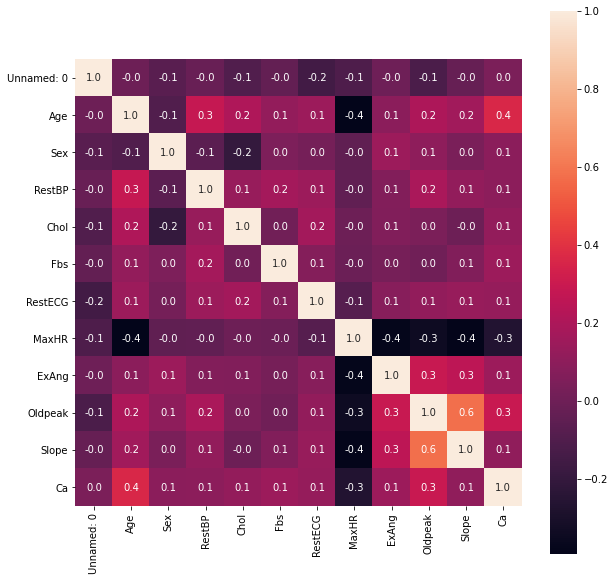

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data = numeric_data.corr(),cbar=True,square=True,fmt='.1f',annot=True)


In [ ]:
attribute = df[['Age','Chol','MaxHR']]

In [ ]:
target = df['RestECG']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(attribute,target,test_size=0.25,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,r2_score,mean_absolute_error

In [ ]:
lr = LogisticRegression()
lr.fit(train_x,train_y)

LogisticRegression()

In [ ]:
lr_y_pred = lr.predict(test_x)

In [ ]:
lr_acc = accuracy_score(test_y,lr_y_pred)
lr_acc

0.5789473684210527

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Minimum error:- 0.3157894736842105 at K = 17


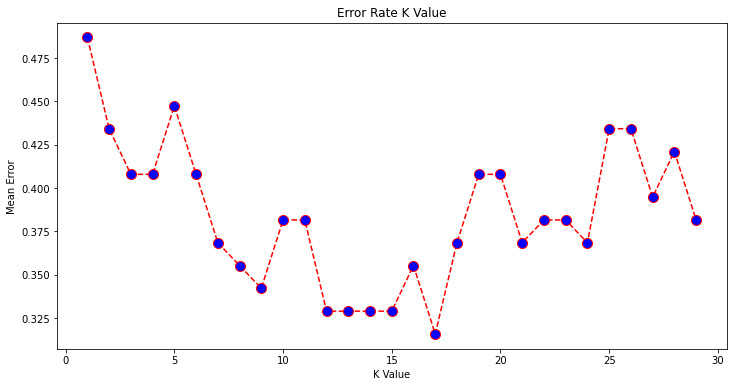

In [ ]:
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x, train_y)
    pred_i = knn.predict(test_x)
    error.append(np.mean(pred_i!= test_y))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

In [ ]:
classifier= KNeighborsClassifier(n_neighbors=7)  
classifier.fit(train_x, train_y)
y_pred= classifier.predict(test_x) 
from sklearn.metrics import confusion_matrix  
confusion_matrix(test_y, y_pred)

array([[21, 13],
       [15, 27]], dtype=int64)

In [ ]:
accuracy_score(test_y, y_pred)

0.631578947368421

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()
nb.fit(train_x,train_y)

GaussianNB()

In [ ]:
nb.score(test_x, test_y)

0.5657894736842105

## Outlier Detection and Removal

In [ ]:
from scipy import stats
import numpy as np

In [ ]:
z = np.abs(stats.zscore(numeric_data))
z

array([[1.72634387, 0.94872647, 0.68620244, ..., 1.08733806, 2.27457861,
               nan],
       [1.71491113, 1.39200191, 0.68620244, ..., 0.39718162, 0.64911323,
               nan],
       [1.70347839, 1.39200191, 0.68620244, ..., 1.34614673, 0.64911323,
               nan],
       ...,
       [1.70347839, 0.28381332, 0.68620244, ..., 0.13837295, 0.64911323,
               nan],
       [1.71491113, 0.28381332, 1.4572959 , ..., 0.89686172, 0.64911323,
               nan],
       [1.72634387, 1.82174501, 0.68620244, ..., 0.89686172, 0.97635214,
               nan]])

<AxesSubplot:>

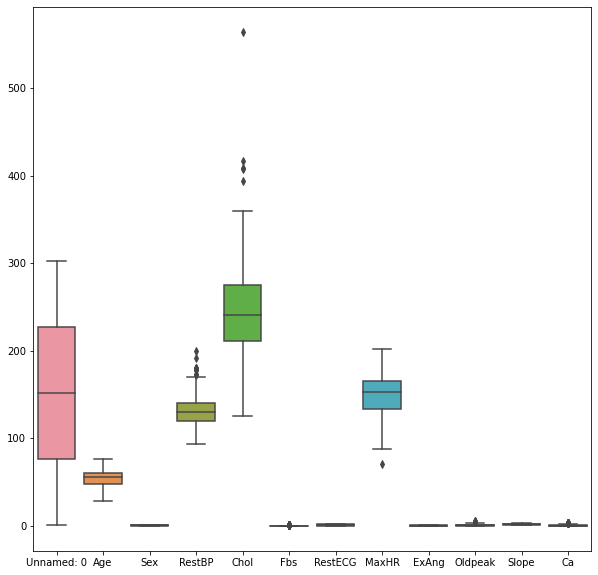

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=numeric_data, )

In [ ]:
threshold = 3
print(np.where(z > 3))

(array([ 48,  91, 121, 123, 126, 152, 181, 188, 245], dtype=int64), array([4, 9, 4, 9, 3, 4, 4, 3, 7], dtype=int64))


In [ ]:
numeric_data = numeric_data[(z < 3).all(axis=1)]